### Goal : Prediction of House Rent

In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('House_Rent_Dataset.csv')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


### Exploratory Data Analysis

In [4]:
data.shape

(4746, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
# data['Posted On'] = pd.DataFrame(data['Posted On'])
# data['Posted On']

In [8]:
data["Year"] = pd.to_datetime(data['Posted On']).dt.year
data['Month'] = pd.to_datetime(data['Posted On']).dt.month
data['Day'] = pd.to_datetime(data['Posted On']).dt.day

In [9]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9


In [10]:
data["Rent"].corr(data["Month"])

0.10192533011050016

In [11]:
data["Rent"].corr(data["Day"])

-0.02378321430527493

In [12]:
data.drop(['Posted On','Year'],axis=1,inplace=True)
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9


In [13]:
data[['Floor_Level','Total_Floor']] = data['Floor'].str.split(r'\s*out of\s*',expand=True)
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor_Level,Total_Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,Ground,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,1,3
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,1,3
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,1,2
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,1,2


In [14]:
data["Floor_Level"].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76'], dtype=object)

In [15]:
data['Floor_Level'] = data['Floor_Level'].replace('Ground',0)
data['Floor_Level'] = data['Floor_Level'].replace('Upper Basement',0)
data['Floor_Level'] = data['Floor_Level'].replace('Lower Basement',0)

In [16]:
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor_Level,Total_Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,0,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,1,3
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,1,3
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,1,2
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,1,2


In [17]:
data['Total_Floor'].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34', None],
      dtype=object)

In [18]:
data.fillna(method="ffill", inplace=True)

In [19]:
data['Total_Floor'].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34'],
      dtype=object)

In [20]:
data['Floor_Level'] = data['Floor_Level'].astype(int)
data['Total_Floor'] = data['Total_Floor'].astype(int)

In [21]:
print(data[data['Floor_Level'] > data['Total_Floor']])

     BHK   Rent  Size       Floor    Area Type      Area Locality     City  \
105    1   6000   600  8 out of 5  Carpet Area  Pratiraksha Nagar  Kolkata   
161    2  10000   450  2 out of 1  Carpet Area             Behala  Kolkata   

    Furnishing Status  Tenant Preferred  Bathroom Point of Contact  Month  \
105       Unfurnished  Bachelors/Family         1    Contact Owner      6   
161    Semi-Furnished  Bachelors/Family         2    Contact Owner      6   

     Day  Floor_Level  Total_Floor  
105    6            8            5  
161   27            2            1  


In [22]:
to_drop = data[data['Floor_Level'] > data['Total_Floor']].index

In [23]:
data.drop(to_drop,inplace = True)

In [24]:
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor_Level,Total_Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,0,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,1,3
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,1,3
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,1,2
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,18,3,5
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,15,1,4
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,7,10,3,5
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,7,6,23,34


In [25]:
data.drop('Floor',axis=1,inplace=True)

In [26]:
data.reset_index(inplace=True)

In [27]:
data

,index,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor_Level,Total_Floor
0,0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,0,2
1,1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,1,3
2,2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,1,3
3,3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,1,2
4,4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,18,3,5
4740,4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,15,1,4
4741,4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,7,10,3,5
4742,4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,7,6,23,34


In [28]:
data.drop('index', axis=1, inplace=True)

In [29]:
data.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor_Level,Total_Floor
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,1,2


### Feature Engineering

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
data['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [32]:
data['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [33]:
data['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [34]:
data['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [35]:
data['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [36]:
data['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [37]:
columns = ['Area Type','Area Locality','City','Furnishing Status','Tenant Preferred','Point of Contact']
for i in columns:
    encoder = LabelEncoder()
    data[i] = encoder.fit_transform(data[i])

In [38]:
data.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor_Level,Total_Floor
0,2,10000,1100,2,221,4,2,1,2,2,5,18,0,2
1,2,20000,800,2,1527,4,1,1,1,2,5,13,1,3
2,2,17000,1000,2,1759,4,1,1,1,2,5,16,1,3
3,2,10000,800,2,526,4,2,1,1,2,7,4,1,2
4,2,7500,850,1,1889,4,2,0,1,2,5,9,1,2


In [39]:
# data.corr()['Rent']

In [40]:
data.drop(['Tenant Preferred','Point of Contact'],axis=1,inplace=True)

In [41]:
import matplotlib.pyplot as plt

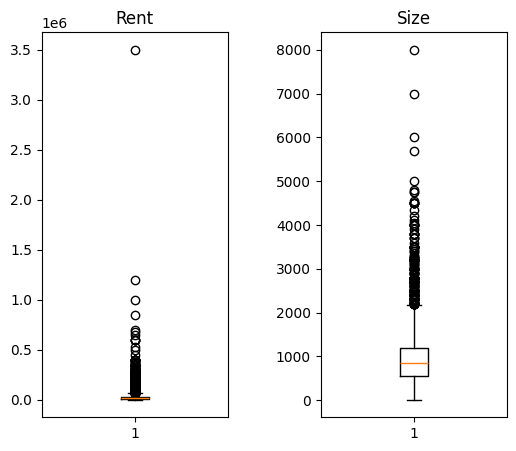

In [42]:
column_names = ['Rent','Size']
plt.figure(figsize=(6,5))
i = 1
for col in column_names:
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    plt.subplot(1,2,i)
    i+=1
    plt.boxplot(data[col])
    plt.title(col)

In [43]:
import numpy as np

In [44]:
# outlayer_columns = ['Rent','Size']
# plt.figure(figsize=(6,5))
# i=1
# for col in outlayer_columns:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5*IQR
#     upper = Q3 - 1.5*IQR
#     upper_index = np.where(data[col]>=upper)[0]
#     lower_index = np.where(data[col]<=lower)[0]
#     data.drop(index = upper_index,inplace=True)
#     data.drop(index = lower_index,inplace=True)

#     plt.subplots_adjust(wspace=0.4,hspace=0.4)
#     plt.subplot(1,2,i)
#     i+=1
#     plt.boxplot(data[col])
#     plt.title(col)
#     plt.show()
#     # data.drop(index,axis=1,inplace=True)
#     data.reset_index(inplace=True,drop=True)

In [45]:
# data.drop(index,axis=1,inplace=True)
# data.reset_index(inplace=True)

In [46]:
Q1 = data['Size'].quantile(0.25)
Q3 = data['Size'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_index = np.where(data['Size']>=upper)[0]
lower_index = np.where(data['Size']<=lower)[0]
data.drop(index = upper_index,inplace=True)
data.drop(index = lower_index,inplace=True)
data.reset_index(inplace=True)
# data.drop(index,axis=1,inplace=True)

In [47]:
Q1 = data['Rent'].quantile(0.25)
Q3 = data['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_index = np.where(data['Rent']>=upper)[0]
lower_index = np.where(data['Rent']<=lower)[0]
data.drop(index = upper_index,inplace=True)
data.drop(index = lower_index,inplace=True)
data.reset_index(inplace=True)

In [48]:
data.head()

,level_0,index,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,Month,Day,Floor_Level,Total_Floor
0,0,0,2,10000,1100,2,221,4,2,2,5,18,0,2
1,1,1,2,20000,800,2,1527,4,1,1,5,13,1,3
2,2,2,2,17000,1000,2,1759,4,1,1,5,16,1,3
3,3,3,2,10000,800,2,526,4,2,1,7,4,1,2
4,4,4,2,7500,850,1,1889,4,2,1,5,9,1,2


In [49]:
data.drop(['level_0','index'], axis=1, inplace=True)

In [50]:
data.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,Month,Day,Floor_Level,Total_Floor
0,2,10000,1100,2,221,4,2,2,5,18,0,2
1,2,20000,800,2,1527,4,1,1,5,13,1,3
2,2,17000,1000,2,1759,4,1,1,5,16,1,3
3,2,10000,800,2,526,4,2,1,7,4,1,2
4,2,7500,850,1,1889,4,2,1,5,9,1,2


In [51]:
data.corr()['Rent']

BHK                  0.365986
Rent                 1.000000
Size                 0.344258
Area Type           -0.297685
Area Locality        0.011797
City                 0.273965
Furnishing Status   -0.197502
Bathroom             0.471361
Month                0.159089
Day                 -0.053780
Floor_Level          0.455340
Total_Floor          0.529879
Name: Rent, dtype: float64

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
data.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,Month,Day,Floor_Level,Total_Floor
0,2,10000,1100,2,221,4,2,2,5,18,0,2
1,2,20000,800,2,1527,4,1,1,5,13,1,3
2,2,17000,1000,2,1759,4,1,1,5,16,1,3
3,2,10000,800,2,526,4,2,1,7,4,1,2
4,2,7500,850,1,1889,4,2,1,5,9,1,2


In [54]:
# data.drop('index',axis=1,inplace=True)

In [55]:
# data.head()

In [56]:
# scale = StandardScaler()
# scaled_data = scale.fit_transform(data)
# data = pd.DataFrame(scaled_data,columns=data.columns)

In [57]:
x = data.drop('Rent',axis=1)
y = data['Rent']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=5)

In [60]:
# Scaling X
x_scaler = StandardScaler()
xtrain = x_scaler.fit_transform(xtrain)
xtest = x_scaler.transform(xtest)

# Scaling y
y_scaler = StandardScaler()
ytrain_scaled = y_scaler.fit_transform(ytrain.values.reshape(-1, 1)).flatten()

In [61]:
# x_scaler = StandardScaler()
# xtrain = x_scaler.fit_transform(xtrain)
# xtest = x_scaler.transform(xtest)

In [62]:
# y_scaler = StandardScaler()
# ytrain_scaled = y_scaler.fit_transform(ytrain.values.reshape(-1, 1))
# ytest_scaled = y_scaler.transform(ytest.values.reshape(-1, 1))

### Model Selection and Training

### SVR

In [63]:
from sklearn.svm import SVR

In [64]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [65]:
svr_model = SVR()
svr_model.fit(xtrain,ytrain)

SVR()

In [66]:
y_pred_scaled = svr_model.predict(xtest)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
print(y_pred_scaled)

[14243.50600653 14283.31076201 14012.26342961 ... 14136.68364563
 14027.97317601 14000.40352548]


In [67]:
# ypred = svr_model.predict(xtest)
# ypred

In [68]:
# ypred = y_scaler.inverse_transform(ypred_scaled.reshape(-1,1)).flatten()

In [69]:
mean_absolute_error(ytest,y_pred_scaled)

8421.373875867874

In [70]:
mean_squared_error(ytest,y_pred_scaled)

149902189.46578023

In [71]:
r2_score(ytest,y_pred_scaled)

-0.09225039033804916

In [72]:
svr_model.predict([[1,150,2,1757,4,0,1,6,22,1,1]])

array([14177.72275021])

### KNN

In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
knn_model = KNeighborsRegressor()
knn_model.fit(xtrain,ytrain)

KNeighborsRegressor()

In [75]:
y_pred_scaled1 = knn_model.predict(xtest)
y_pred1 = y_scaler.inverse_transform(y_pred_scaled1.reshape(-1, 1)).flatten()
print(y_pred_scaled1)

[51000. 33400. 12900. ... 19500. 13600. 11100.]


In [76]:
mean_absolute_error(ytest,y_pred_scaled1)

5461.994758394758

In [77]:
mean_squared_error(ytest,y_pred_scaled1)

62730794.66470107

In [78]:
r2_score(ytest,y_pred_scaled1)

0.5429170500916731

### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
tree_model = DecisionTreeRegressor()
tree_model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [81]:
y_pred_scaled2 = tree_model.predict(xtest)
y_pred2 = y_scaler.inverse_transform(y_pred_scaled2.reshape(-1, 1)).flatten()
print(y_pred_scaled2)

[45000. 20000. 18000. ...  9000. 13000.  7500.]


In [82]:
mean_absolute_error(ytest,y_pred_scaled2)

6346.4021294021295

In [83]:
mean_squared_error(ytest,y_pred_scaled2)

84886403.80917281

In [84]:
r2_score(ytest,y_pred_scaled2)

0.3814819648372927

### Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr_model = LinearRegression()
lr_model.fit(xtrain,ytrain)

LinearRegression()

In [87]:
y_pred_scaled3 = lr_model.predict(xtest)
y_pred3 = y_scaler.inverse_transform(y_pred_scaled3.reshape(-1, 1)).flatten()
print(y_pred_scaled3)

[35593.71737874 26738.83473001 15052.30152819 ... 20454.26241199
 11915.68264287 12349.75970197]


In [88]:
mean_absolute_error(ytest,y_pred_scaled3)

6139.542266746384

In [89]:
mean_squared_error(ytest,y_pred_scaled3)

70459237.53523716

In [90]:
r2_score(ytest,y_pred_scaled3)

0.4866043653194778

### Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)

RandomForestRegressor()

In [93]:
y_pred_scaled4 = rf_model.predict(xtest)
y_pred4 = y_scaler.inverse_transform(y_pred_scaled4.reshape(-1, 1)).flatten()
print(y_pred_scaled4)

[43255.   30835.   11125.   ... 18766.96 10972.    8465.  ]


In [94]:
mean_absolute_error(ytest,y_pred_scaled4)

4465.053946023946

In [95]:
mean_squared_error(ytest,y_pred_scaled4)

39846966.629389435

In [96]:
r2_score(ytest,y_pred_scaled4)

0.7096582444202841

### Grdient Boost

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
gb_model = GradientBoostingRegressor()
gb_model.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [99]:
y_pred_scaled5 = gb_model.predict(xtest)
y_pred5 = y_scaler.inverse_transform(y_pred_scaled5.reshape(-1, 1)).flatten()
print(y_pred_scaled5)

[45039.50631957 29856.69114275 11423.00385106 ... 14599.00824683
 14262.6043097   8131.72799512]


In [100]:
mean_absolute_error(ytest,y_pred_scaled5)

4503.006711179313

In [101]:
mean_squared_error(ytest,y_pred_scaled5)

40524689.02548862

In [102]:
r2_score(ytest,y_pred_scaled5)

0.7047200740418644

### AdaBoost

In [103]:
from sklearn.ensemble import AdaBoostRegressor

In [104]:
ab_model = AdaBoostRegressor()
ab_model.fit(xtrain,ytrain)

AdaBoostRegressor()

In [105]:
y_pred_scaled6 = ab_model.predict(xtest)
y_pred6 = y_scaler.inverse_transform(y_pred_scaled6.reshape(-1, 1)).flatten()
print(y_pred_scaled6)

[40116.21945137 32648.61371237 14983.85790032 ... 19465.51155116
 16604.54736842 11554.6161435 ]


In [106]:
mean_absolute_error(ytest,y_pred_scaled6)

6385.0441522803185

In [107]:
mean_squared_error(ytest,y_pred_scaled6)

61605015.630973995

In [108]:
r2_score(ytest,y_pred_scaled6)

0.5511199495516805

### XGBoost

In [109]:
from xgboost import XGBRegressor

In [110]:
xg_model = XGBRegressor()
xg_model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [111]:
y_pred_scaled7 = xg_model.predict(xtest)
y_pred7 = y_scaler.inverse_transform(y_pred_scaled7.reshape(-1, 1)).flatten()
print(y_pred_scaled7)

[39288.055  28421.613  12933.106  ... 14281.596  13664.911   8505.1455]


In [112]:
mean_absolute_error(ytest,y_pred_scaled7)

4519.621287702831

In [113]:
mean_squared_error(ytest,y_pred_scaled7)

41587150.604393624

In [114]:
r2_score(ytest,y_pred_scaled7)

0.6969785690307617

### Comparing models and selecting model with best r2-score and error

In [115]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
# from sklearn.linear_model import LinearRegression

In [116]:
models = {
    'svr' : SVR(),
    'knn' : KNeighborsRegressor(),
    'decision tree' : DecisionTreeRegressor(random_state=120),
    'randomforest' : RandomForestRegressor(random_state=10),
    'adaboost' : AdaBoostRegressor(random_state=10),
    'gradientboost' : GradientBoostingRegressor(random_state=10),
    'xgb' : XGBRegressor(random_state=10),
    'linear' : LinearRegression()
}

In [117]:
results = {}
for m, model in models.items():   # passing dictionary type.
    model.fit(xtrain,ytrain)
    y_pred_scaled = model.predict(xtest)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    mae = mean_absolute_error(ytest,y_pred_scaled)
    mse = mean_squared_error(ytest,y_pred_scaled)
    R2score = r2_score(ytest, y_pred_scaled)
    rmse = mean_squared_error(ytest,y_pred_scaled,squared=False)
    results[m] = {'MAE' : mae,'MSE' : mse,'r2_score' : R2score,'RMSE' : rmse}

pd.DataFrame(results).T

,MAE,MSE,r2_score,RMSE
svr,8421.373876,1.499022e+08,-0.092250,12243.454964
knn,5461.994758,6.273079e+07,0.542917,7920.277436
decision tree,6265.764128,8.287899e+07,0.396109,9103.789991
randomforest,4512.971259,4.057137e+07,0.704380,6369.566098
adaboost,6767.529280,6.774529e+07,0.506379,8230.752892
gradientboost,4502.668109,4.051843e+07,0.704766,6365.408935
xgb,4519.621288,4.158715e+07,0.696979,6448.810015
linear,6139.542267,7.045924e+07,0.486604,8394.000091


### Result : The model with best r2-score and error is Gradient Boost comparing to others

#### Hyperparameter tuning

In [118]:
new_models = {
    'svr' : {'model' : SVR(),
             'params' : {'C':[1,10,20],'kernel':['rbf','linear']}
            },
    'random_forest' : {'model' : RandomForestRegressor(),
                       'params' : {'n_estimators' : [1,5,10]}
                      },
    'KNeighbors' : {'model' : KNeighborsRegressor(),
                    'params' : {'n_neighbors':[2,3,5,10]}
                   },
    'adaboost' : {'model' : AdaBoostRegressor(),
                  'params' : {'n_estimators' :[50,100,120]}
                 },
    'decision_tree' : {'model' : DecisionTreeRegressor(),
                       'params' : {'criterion' : ['squared_error'],'max_depth' : [7,10,15]}
                      },
    'gradient_boost' : {'model' : GradientBoostingRegressor(),
                        'params' : {'learning_rate' : [0.1,0.3,0.6,0.8],'n_estimators' : [40,60,80,100,140],
                                  'max_depth' : [3,5,7]}},
    'xgboost' : {'model' : XGBRegressor(),
                 'params' : {'learning_rate' : [0.1,0.3,0.6,0.7],'n_estimators' : [30,40,50,70]},
                           'max_depth' : [4,6,8]},
    'linear' : {'model' : LinearRegression(),
                'params' : {'n_jobs' :[1,2],'fit_intercept':[True,False]}}
}

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
# scores = []
# values = ['svr','random_forest','KNeighbors','adaboost','decision_tree','gradient_boost','xgboost','linear']
# for model in values:
#     model_info = new_models[model]
#     gs = GridSearchCV(model_info['model'],model_info['params'],cv=5)
#     gs.fit(xtrain,ytrain)
#     scores.append({'model':model,'best_score':gs.best_score_,'best_params':gs.best_params_})

# pd.DataFrame(scores)

### Deploying the Model

In [121]:
import joblib

In [122]:
joblib.dump(gb_model,'gb_model')

['gb_model']

In [123]:
model_reload = joblib.load('gb_model')

In [124]:
# data

In [125]:
# data['Month'].unique()